{'household.nadults': ['household.hhsize', 'household.nchildren'], 'household.cars_per_adults': ['household.cars', 'household.nadults'], 'household.cars_per_adults_gt1': ['household.cars_per_adults'], 'household.sqrt_hhsize': ['household.hhsize'], 'household.nchildren': ['person.is_child', 'person.household_id'], 'person.is_child': ['person.age'], 'person.nadults': ['household.nadults', 'person.household_id']}


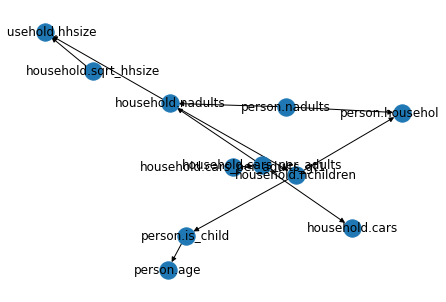

In [13]:
import networkx as nx
from ast_dependencies import *
import itertools

print(dep_graph)

G = nx.DiGraph()
for k, v in dep_graph.items():
    G.add_node(k)
    G.add_nodes_from(v)
    edges = itertools.zip_longest(v, [k], fillvalue=k)
    G.add_edges_from(edges)
    
nx.draw(G, with_labels=True)
import pylab as plt
plt.savefig('deps.png')

In [ ]:
for v in dep_graph.keys():
    assert G.has_node(v)
    nx.algorithms.dag.ancestors(G, v)

def traverse(G, v):
    print(f"{v}->")
    return [traverse(G, n) for n in G.predecessors(v)]